In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [13]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IoTBotNetDataset.csv")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1.0,1.528089e+09,e,1.0,tcp,1.0,192.168.100.147,49960,192.168.100.7,80,...,1.127040,96.0,75.0,1.133720,1.129970,770.0,602.0,1.0,DoS,HTTP
1,2.0,1.528089e+09,e,1.0,arp,2.0,192.168.100.7,-1,192.168.100.147,-1,...,15267.200000,1.0,2.0,0.005142,0.005142,2.0,6.0,1.0,DoS,HTTP
2,3.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49962,192.168.100.7,80,...,1.127040,96.0,75.0,1.135100,1.129970,770.0,602.0,1.0,DoS,HTTP
3,4.0,1.528089e+09,i,1.0,tcp,1.0,192.168.100.147,49964,192.168.100.7,80,...,1.127040,96.0,75.0,1.135140,1.129970,770.0,602.0,1.0,DoS,HTTP
4,5.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49966,192.168.100.7,80,...,1.127040,96.0,75.0,1.135260,1.129970,770.0,602.0,1.0,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998548,998549.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24881,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998549,998550.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24882,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998550,998551.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24883,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998551,998552.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24884,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP


In [14]:
# 2. Drop the columns not required for your analysis. 
df1 = df.drop(labels='category', axis=1)
df1

,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategory
0,1.0,1.528089e+09,e,1.0,tcp,1.0,192.168.100.147,49960,192.168.100.7,80,...,1.142970,1.127040,96.0,75.0,1.133720,1.129970,770.0,602.0,1.0,HTTP
1,2.0,1.528089e+09,e,1.0,arp,2.0,192.168.100.7,-1,192.168.100.147,-1,...,0.003857,15267.200000,1.0,2.0,0.005142,0.005142,2.0,6.0,1.0,HTTP
2,3.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49962,192.168.100.7,80,...,1.142970,1.127040,96.0,75.0,1.135100,1.129970,770.0,602.0,1.0,HTTP
3,4.0,1.528089e+09,i,1.0,tcp,1.0,192.168.100.147,49964,192.168.100.7,80,...,1.142970,1.127040,96.0,75.0,1.135140,1.129970,770.0,602.0,1.0,HTTP
4,5.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49966,192.168.100.7,80,...,1.142970,1.127040,96.0,75.0,1.135260,1.129970,770.0,602.0,1.0,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998548,998549.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24881,192.168.100.5,80,...,0.269102,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,UDP
998549,998550.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24882,192.168.100.5,80,...,0.269102,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,UDP
998550,998551.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24883,192.168.100.5,80,...,0.269102,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,UDP
998551,998552.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24884,192.168.100.5,80,...,0.269102,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,UDP


In [55]:
# 3. Do a missing value analysis and perform appropriate steps to correct them
df.isnull()
df.fillna(0)

,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1.0,1.528089e+09,e,1.0,tcp,1.0,192.168.100.147,49960,192.168.100.7,80,...,1.127040,96.0,75.0,1.133720,1.129970,770.0,602.0,1.0,DoS,HTTP
1,2.0,1.528089e+09,e,1.0,arp,2.0,192.168.100.7,-1,192.168.100.147,-1,...,15267.200000,1.0,2.0,0.005142,0.005142,2.0,6.0,1.0,DoS,HTTP
2,3.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49962,192.168.100.7,80,...,1.127040,96.0,75.0,1.135100,1.129970,770.0,602.0,1.0,DoS,HTTP
3,4.0,1.528089e+09,i,1.0,tcp,1.0,192.168.100.147,49964,192.168.100.7,80,...,1.127040,96.0,75.0,1.135140,1.129970,770.0,602.0,1.0,DoS,HTTP
4,5.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49966,192.168.100.7,80,...,1.127040,96.0,75.0,1.135260,1.129970,770.0,602.0,1.0,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998548,998549.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24881,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998549,998550.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24882,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998550,998551.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24883,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998551,998552.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24884,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


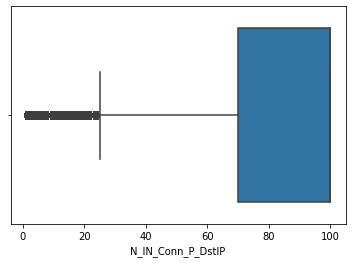

In [97]:
# 4. Perform an outlier analysis for any two columns
sns.boxplot(df['N_IN_Conn_P_DstIP'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


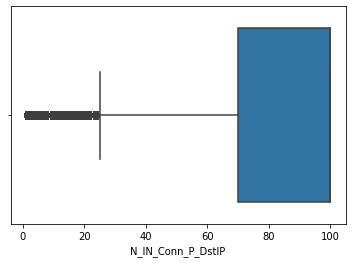

In [95]:
sns.boxplot(df['N_IN_Conn_P_DstIP'])

In [54]:
# 5.	Do a correlation analysis of any two variables.
print(df['rate'].corr(df['srate']))

0.18904714981030551


In [15]:
# 6.	Describe the data
df.describe()

,pkSeqID,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,996297.000000,9.962970e+05,996297.000000,996294.000000,996297.000000,996297.000000,996297.000000,9.962970e+05,996297.000000,996297.000000,...,996297.000000,996297.000000,996297.000000,996297.000000,996297.000000,996297.000000,996297.000000,996297.000000,996297.000000,996297.0
mean,500191.103927,1.528083e+09,1.808430,1.765398,6.520403,614.684976,2.826334,1.528083e+09,114587.944475,27.115614,...,650.382948,1.586263,1.591356,83.367601,83.344421,1.589005,1.256640,488.192833,487.989795,1.0
std,287942.231266,1.754173e+03,1.107501,0.972087,8.634993,605.434762,1.210459,1.752839e+03,75872.879322,11.633506,...,250.475791,28.424912,28.710936,23.692729,23.707796,23.887935,22.312290,296.422287,296.309507,0.0
min,1.000000,1.528081e+09,1.000000,1.000000,1.000000,120.000000,1.000000,1.528081e+09,1.000000,0.000000,...,2.000000,0.003857,0.003857,1.000000,1.000000,0.000000,0.005142,1.000000,1.000000,1.0
25%,251331.000000,1.528081e+09,1.000000,1.000000,5.000000,462.000000,1.000000,1.528081e+09,49526.000000,24.027264,...,500.000000,0.177890,0.177890,70.000000,70.000000,0.171433,0.179636,286.000000,286.000000,1.0
50%,500405.000000,1.528081e+09,2.000000,1.000000,6.000000,616.000000,3.000000,1.528081e+09,101864.000000,26.371984,...,600.000000,0.232549,0.232549,100.000000,100.000000,0.237190,0.231424,400.000000,400.000000,1.0
75%,749479.000000,1.528085e+09,2.000000,3.000000,8.000000,770.000000,4.000000,1.528085e+09,179137.000000,30.317171,...,782.000000,0.340498,0.340498,100.000000,100.000000,0.340519,0.340938,600.000000,600.000000,1.0
max,998553.000000,1.528089e+09,6.000000,4.000000,5886.000000,412020.000000,5.000000,1.528090e+09,262212.000000,1555.683960,...,5886.000000,15748.000000,15267.200000,100.000000,100.000000,13245.000000,13245.000000,5886.000000,5886.000000,1.0


In [16]:
# 7.	Display the first 3 rows
df.head(3)

,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1.0,1.528089e+09,e,1.0,tcp,1.0,192.168.100.147,49960,192.168.100.7,80,...,1.12704,96.0,75.0,1.133720,1.129970,770.0,602.0,1.0,DoS,HTTP
1,2.0,1.528089e+09,e,1.0,arp,2.0,192.168.100.7,-1,192.168.100.147,-1,...,15267.20000,1.0,2.0,0.005142,0.005142,2.0,6.0,1.0,DoS,HTTP
2,3.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49962,192.168.100.7,80,...,1.12704,96.0,75.0,1.135100,1.129970,770.0,602.0,1.0,DoS,HTTP


In [17]:
# 8.	Display the last 4 rows
df.tail(4)

,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
998549,998550.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24882,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998550,998551.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24883,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998551,998552.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24884,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998552,998553.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24885,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP


In [57]:
# 9.	Locate the first row corresponding to the proto as “UDP” 
df.loc[df.proto=="UDP"].head(1)

,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
2,3.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49962,192.168.100.7,80,...,1.12704,96.0,75.0,1.1351,1.12997,770.0,602.0,1.0,DoS,HTTP


In [18]:
# 10.	How many rows of data do you have?
len(df.index)

998553

In [25]:
# 11.	Display the first 5 columns of the first row
df.iloc[:5,:1]

,pkSeqID
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [27]:
# 12.	Count the number of packets affected  based on flags as “i”
len(df.loc[df["flags"]=="i"])

30

In [84]:
# 13. Split the traffic based on traffic into two groups Group 1: pkts<=10 and Group 2:pkts>10
# 13.	Evaluate the characteristics of the packets  distribution with mean and, deviation 
# (a) Average packets for a given stime (b) Average sbytes for a given stime  (c) Average dbytes for a given stime 
d1=df.loc[df.pkts<=10]
d2=df.loc[df.pkts>10]
display(d1,d2)
display(d1.describe(),d2.describe())

,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1.0,1.528089e+09,e,1.0,tcp,1.0,192.168.100.147,49960,192.168.100.7,80,...,1.127040,96.0,75.0,1.133720,1.129970,770.0,602.0,1.0,DoS,HTTP
1,2.0,1.528089e+09,e,1.0,arp,2.0,192.168.100.7,-1,192.168.100.147,-1,...,15267.200000,1.0,2.0,0.005142,0.005142,2.0,6.0,1.0,DoS,HTTP
2,3.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49962,192.168.100.7,80,...,1.127040,96.0,75.0,1.135100,1.129970,770.0,602.0,1.0,DoS,HTTP
3,4.0,1.528089e+09,i,1.0,tcp,1.0,192.168.100.147,49964,192.168.100.7,80,...,1.127040,96.0,75.0,1.135140,1.129970,770.0,602.0,1.0,DoS,HTTP
4,5.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49966,192.168.100.7,80,...,1.127040,96.0,75.0,1.135260,1.129970,770.0,602.0,1.0,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998548,998549.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24881,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998549,998550.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24882,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998550,998551.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24883,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998551,998552.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24884,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP


,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
144,145.0,1.528089e+09,e s,2.0,tcp,1.0,192.168.100.148,51962,192.168.100.7,80,...,1.096110,46.0,46.0,1.615570,1.135480,375.0,375.0,1.0,DoS,HTTP
276,277.0,1.528089e+09,e s,2.0,tcp,1.0,192.168.100.149,52812,192.168.100.3,80,...,1.240990,90.0,76.0,2.012510,1.278180,754.0,628.0,1.0,DoS,HTTP
277,278.0,1.528089e+09,e s,2.0,UDP,1.0,192.168.100.149,52814,192.168.100.3,80,...,1.240990,90.0,76.0,1.581320,1.278180,754.0,628.0,1.0,DoS,HTTP
278,279.0,1.528089e+09,e s,2.0,UDP,1.0,192.168.100.149,52816,192.168.100.3,80,...,1.240990,90.0,76.0,1.725150,1.278180,754.0,628.0,1.0,DoS,HTTP
283,284.0,1.528089e+09,e s,2.0,tcp,1.0,192.168.100.149,52820,192.168.100.3,80,...,1.240990,90.0,76.0,2.239860,1.278180,754.0,628.0,1.0,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998213,998214.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.150,57478,192.168.100.3,80,...,0.483652,18.0,18.0,0.483652,0.351218,234.0,234.0,1.0,DoS,UDP
998214,998215.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.150,57479,192.168.100.3,80,...,0.483652,18.0,18.0,0.483652,0.351218,234.0,234.0,1.0,DoS,UDP
998215,998216.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.150,57480,192.168.100.3,80,...,0.483652,18.0,18.0,0.483652,0.351218,234.0,234.0,1.0,DoS,UDP
998216,998217.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.150,57481,192.168.100.3,80,...,0.483652,18.0,18.0,0.483652,0.351218,234.0,234.0,1.0,DoS,UDP


,pkSeqID,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,875049.000000,8.750490e+05,875049.000000,875046.000000,875049.000000,875049.000000,875049.000000,8.750490e+05,875049.000000,875049.000000,...,875049.000000,875049.000000,875049.000000,875049.000000,875049.000000,875049.000000,875049.000000,875049.000000,875049.000000,875049.0
mean,453665.730100,1.528082e+09,1.919802,1.594910,5.763201,599.805765,2.664259,1.528082e+09,116941.212148,27.190257,...,584.825132,1.743525,1.749324,83.447846,83.422086,1.746598,1.371111,419.717112,419.491779,1.0
std,273994.691266,1.654238e+03,1.136818,0.914261,1.836620,195.968509,1.204595,1.652752e+03,77266.267429,12.390290,...,183.338841,30.325485,30.630701,23.668052,23.684302,25.483436,23.803780,223.051071,222.809689,0.0
min,1.000000,1.528081e+09,1.000000,1.000000,1.000000,120.000000,1.000000,1.528081e+09,1.000000,0.000000,...,2.000000,0.003857,0.003857,1.000000,1.000000,0.000000,0.005142,1.000000,1.000000,1.0
25%,221077.000000,1.528081e+09,1.000000,1.000000,5.000000,420.000000,1.000000,1.528081e+09,49614.000000,23.589230,...,479.000000,0.167220,0.167220,70.000000,70.000000,0.163702,0.171312,270.000000,270.000000,1.0
50%,439841.000000,1.528081e+09,2.000000,1.000000,6.000000,616.000000,3.000000,1.528081e+09,104879.000000,26.063435,...,569.000000,0.219420,0.219420,100.000000,100.000000,0.221926,0.217974,372.000000,372.000000,1.0
75%,661055.000000,1.528085e+09,2.000000,3.000000,7.000000,770.000000,4.000000,1.528085e+09,183830.000000,31.011560,...,665.000000,0.290801,0.290801,100.000000,100.000000,0.291395,0.302580,546.000000,546.000000,1.0
max,998553.000000,1.528089e+09,6.000000,3.000000,10.000000,3066.000000,4.000000,1.528090e+09,262212.000000,1555.683960,...,1295.000000,15748.000000,15267.200000,100.000000,100.000000,13245.000000,13245.000000,1082.000000,1082.000000,1.0


,pkSeqID,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,121248.000000,1.212480e+05,121248.000000,121248.000000,121248.000000,121248.000000,121248.000000,1.212480e+05,121248.000000,121248.000000,...,121248.000000,121248.000000,121248.000000,121248.000000,121248.000000,121248.000000,121248.000000,121248.000000,121248.000000,121248.0
mean,835965.564884,1.528085e+09,1.004652,2.995802,11.985146,722.068512,3.996033,1.528085e+09,97604.369293,26.576912,...,1123.514887,0.451302,0.451300,82.788475,82.783914,0.451652,0.430506,982.383347,982.341210,1.0
std,105397.376955,1.653642e+02,0.126993,0.092297,23.544528,1649.754250,0.098195,1.642364e+02,62356.517433,1.948570,...,134.396017,0.813511,0.813503,23.862170,23.869277,0.813567,0.814316,291.332284,291.411775,0.0
min,145.000000,1.528081e+09,1.000000,1.000000,11.000000,660.000000,1.000000,1.528081e+09,1.000000,3.885272,...,17.000000,0.085599,0.085599,1.000000,1.000000,0.184839,0.078237,11.000000,11.000000,1.0
25%,744142.750000,1.528085e+09,1.000000,3.000000,11.000000,660.000000,4.000000,1.528085e+09,48694.750000,25.320789,...,1070.000000,0.428751,0.428751,70.000000,70.000000,0.429252,0.409628,814.000000,814.000000,1.0
50%,836815.500000,1.528085e+09,1.000000,3.000000,12.000000,720.000000,4.000000,1.528085e+09,89288.500000,26.858641,...,1112.000000,0.441397,0.441397,98.000000,98.000000,0.441426,0.433510,1100.000000,1100.000000,1.0
75%,927420.250000,1.528085e+09,1.000000,3.000000,12.000000,720.000000,4.000000,1.528085e+09,140111.250000,27.213820,...,1200.000000,0.469416,0.469416,100.000000,100.000000,0.469820,0.454642,1200.000000,1200.000000,1.0
max,998218.000000,1.528089e+09,6.000000,4.000000,5886.000000,412020.000000,5.000000,1.528089e+09,258070.000000,62.429565,...,5886.000000,200.822000,200.822000,100.000000,100.000000,200.822000,200.822000,5886.000000,5886.000000,1.0


In [85]:
# a
d1.groupby("stime").pkts.mean()

stime
1.528081e+09     5.110172
1.528081e+09     5.392040
1.528081e+09     5.370576
1.528081e+09     5.133389
1.528081e+09     4.801621
                  ...    
1.528089e+09     9.250000
1.528089e+09     8.222222
1.528089e+09     8.000000
1.528089e+09    10.000000
1.528089e+09    10.000000
Name: pkts, Length: 96, dtype: float64

In [86]:
# b
d1.groupby("stime").sbytes.mean()

stime
1.528081e+09     686.052822
1.528081e+09     658.272526
1.528081e+09     651.063572
1.528081e+09     619.102752
1.528081e+09     582.624001
                   ...     
1.528089e+09    1104.500000
1.528089e+09     791.444444
1.528089e+09     768.812500
1.528089e+09     846.498195
1.528089e+09     847.029412
Name: sbytes, Length: 96, dtype: float64

In [87]:
# c
d1.groupby("stime").dbytes.mean()

stime
1.528081e+09      33.104427
1.528081e+09      51.930759
1.528081e+09      53.271446
1.528081e+09      51.975846
1.528081e+09      46.395426
                   ...     
1.528089e+09    1330.000000
1.528089e+09    1337.333333
1.528089e+09     700.000000
1.528089e+09     766.000000
1.528089e+09    1396.000000
Name: dbytes, Length: 96, dtype: float64

In [61]:
# 14.	Compute the mean and the variance of " Pkts_PState_P_Protocol_P_DestIP” for subcategory as HTTP and TCP  
df1 = (df.loc[df["subcategory"]=="HTTP"])
df2 = (df.loc[df["subcategory"]=="TCP"])

# HTTP
meanht = df1["Pkts_P_State_P_Protocol_P_DestIP"].mean() 
varht = df1["Pkts_P_State_P_Protocol_P_DestIP"].var()
print("Mean HTTP : ",meanht,"| Variance HTTP : ",varht)

# TCP
meanht = df2["Pkts_P_State_P_Protocol_P_DestIP"].mean() 
varht = df2["Pkts_P_State_P_Protocol_P_DestIP"].var()
print("Mean TCP : ",meanht,"| Variance TCP : ",varht)

Mean HTTP :  746.0976430976431 | Variance HTTP :  60446.44800657065
Mean TCP :  329.8424106502549 | Variance TCP :  21456.481203437987


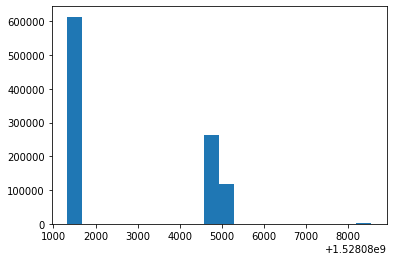

0         1.528089e+09
1         1.528089e+09
2         1.528089e+09
3         1.528089e+09
4         1.528089e+09
              ...     
998548    1.528085e+09
998549    1.528085e+09
998550    1.528085e+09
998551    1.528085e+09
998552    1.528085e+09
Name: stime, Length: 998553, dtype: float64

In [79]:
# 15.	Draw a histogram for packets with stime as 1528088521, 1528088522., 1528088523. 
# Histogram should be step-filled with bin of size 20. Find the skew of this distribution, 
# and comment if it is positive or negative
k=df["stime"]
df1 = df["stime"].loc[df["stime"]==1528088522]
l1=len(df1)
df2 = df["stime"].loc[df["stime"]==1528088521]
l2=len(df2)
df3 = df["stime"].loc[df["stime"]==1528088523]
l3=len(df3)
# k=[l1,l2,l3]
plt.hist(k, bins = 20)
plt.show()
display(k)

In [89]:
# 4,15